# Analysis of Covid-19 vaccination

## Introduction
Covid-19 vaccines help us acquire the much needed immunity against the coronavirus. The CDC has approved about three covid-19 vaccines so far. It's important not to wait for a specific brand. All current and approved vaccines are safe, effective and help reduce risk of severe illness

## Goal
By carrying out statistical analysis and visualization on the different brand of vaccines and the rate at which these vaccines are being administered, we should be able to see clearly which countries are doing better in terms of vaccination and which  brand of vaccine  people are acquiring the more especially in the United States. 

## Dataset

Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded. I'm working with two datasets; Vaccines dataset and vaccines by manufacturer dataset

### Vaccines dataset

It has Country-by-country data on global COVID-19 vaccinations. We only rely on figures that are verifiable based on public official sources.
Some of the columns in this dataset includes:

location: name of the country (or region within a country).

iso_code: ISO 3166-1 alpha-3 – three-letter country codes.

date: date of the observation.

total_vaccinations: total number of doses administered. This is counted as a single dose, and may not equal the total number of people vaccinated, depending on the specific dose regime (e.g. people receive multiple doses). If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again.

total_vaccinations_per_hundred: total_vaccinations per 100 people in the total population of the country.

daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.

daily_vaccinations: new doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, we assume that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. An example of how we perform this calculation can be found here.

daily_vaccinations_per_million: daily_vaccinations per 1,000,000 people in the total population of the country.
people_vaccinated: total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same.

people_vaccinated_per_hundred: people_vaccinated per 100 people in the total population of the country.

people_fully_vaccinated: total number of people who received all doses prescribed by the vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.

people_fully_vaccinated_per_hundred: people_fully_vaccinated per 100 people in the total population of the country.

Link to datset website:   https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

Link to download dataset: https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv

### Vaccines by manufacturer dataset

Our dataset has the following columns:

Location - country;

Date - date;

Vaccine - vaccine type;

Total number of vaccinations - total number of vaccinations / current time and vaccine type.

Link to datset github: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

link to download dataset: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# url link
url1 = "https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv"  #vaccines dataset (dataset1)
url2 = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv" # vaccines by manufacturer dataset (dataset2)

In [3]:
# read dataset from url
df_vacc = pd.read_csv(url1)
df_vacc_manufac = pd.read_csv(url2)

## Data exploration

In [4]:
# first 5 rows of dataset1
df_vacc.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [5]:
# firast 5 rows of dataset2
df_vacc_manufac.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31201
4,Austria,2021-01-15,Johnson&Johnson,0


In [6]:
# Last 5 rows of dataset1
df_vacc.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
57266,Zimbabwe,ZWE,2021-10-22,5814790.0,3271638.0,2543152.0,NaN,17507.0,20007.0,38.53,21.68,16.85,NaN,1326.0
57267,Zimbabwe,ZWE,2021-10-23,5826876.0,3276746.0,2550130.0,NaN,12086.0,19845.0,38.61,21.71,16.90,NaN,1315.0
57268,Zimbabwe,ZWE,2021-10-24,5836363.0,3281618.0,2554745.0,NaN,9487.0,19241.0,38.67,21.74,16.93,NaN,1275.0
57269,Zimbabwe,ZWE,2021-10-25,5848934.0,3287996.0,2560938.0,NaN,12571.0,15135.0,38.75,21.79,16.97,NaN,1003.0
57270,Zimbabwe,ZWE,2021-10-26,5866629.0,3294687.0,2571942.0,NaN,17695.0,15697.0,38.87,21.83,17.04,NaN,1040.0


In [7]:
# last 5rows of dataset2
df_vacc_manufac.tail()

,location,date,vaccine,total_vaccinations
19167,European Union,2021-10-26,Oxford/AstraZeneca,67193060
19168,European Union,2021-10-26,Pfizer/BioNTech,412754586
19169,European Union,2021-10-26,Sinopharm/Beijing,2114145
19170,European Union,2021-10-26,Sinovac,9
19171,European Union,2021-10-26,Sputnik V,1843735


In [8]:
# shape of dataset1
df_vacc.shape

(57271, 14)

dataset has 24317 rows and 12 columns

In [9]:
# shape of dataset2
df_vacc_manufac.shape

(19172, 4)

Dataset has 5233 rows and 4 columns

In [10]:
# statistics of our datset1
df_vacc.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
count,3.267000e+04,3.115500e+04,2.804000e+04,4.992000e+03,2.741400e+04,5.699400e+04,32670.000000,31155.000000,28040.000000,4992.000000,56994.000000
mean,9.595445e+07,5.243857e+07,3.483802e+07,1.889452e+06,1.000169e+06,4.927175e+05,49.447504,29.092164,22.332836,2.018343,3487.221444
std,4.609587e+08,2.555842e+08,1.811776e+08,5.306292e+06,3.988573e+06,2.749272e+06,48.707707,25.743624,23.206993,5.685130,4200.886198
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.537395e+05,2.617970e+05,1.430960e+05,1.160000e+02,6.360500e+03,1.074250e+03,6.060000,4.510000,2.500000,0.000000,585.000000
50%,2.549350e+06,1.758178e+06,1.129310e+06,2.808300e+04,3.539100e+04,8.749000e+03,32.675000,22.610000,12.895000,0.030000,2260.000000
75%,1.492576e+07,9.295934e+06,6.323858e+06,8.771670e+05,2.269632e+05,6.053150e+04,85.090000,51.465000,39.042500,0.832500,5143.000000
max,6.918225e+09,3.847955e+09,2.974226e+09,6.162649e+07,5.627922e+07,4.339134e+07,259.330000,120.350000,118.140000,44.640000,117497.000000


In [11]:
# statistics of dataset2
df_vacc_manufac.describe()

,total_vaccinations
count,1.917200e+04
mean,1.143299e+07
std,3.913110e+07
min,0.000000e+00
25%,7.064100e+04
50%,7.756185e+05
75%,5.173990e+06
max,4.127546e+08


In [12]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57271 entries, 0 to 57270
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             57271 non-null  object 
 1   iso_code                             57271 non-null  object 
 2   date                                 57271 non-null  object 
 3   total_vaccinations                   32670 non-null  float64
 4   people_vaccinated                    31155 non-null  float64
 5   people_fully_vaccinated              28040 non-null  float64
 6   total_boosters                       4992 non-null   float64
 7   daily_vaccinations_raw               27414 non-null  float64
 8   daily_vaccinations                   56994 non-null  float64
 9   total_vaccinations_per_hundred       32670 non-null  float64
 10  people_vaccinated_per_hundred        31155 non-null  float64
 11  people_fully_vaccinated_per_

our date should be in date time not string

In [13]:
df_vacc['date'] = pd.to_datetime(df_vacc['date'])

In [14]:
df_vacc_manufac['date'] = pd.to_datetime(df_vacc['date'])

In [15]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57271 entries, 0 to 57270
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             57271 non-null  object        
 1   iso_code                             57271 non-null  object        
 2   date                                 57271 non-null  datetime64[ns]
 3   total_vaccinations                   32670 non-null  float64       
 4   people_vaccinated                    31155 non-null  float64       
 5   people_fully_vaccinated              28040 non-null  float64       
 6   total_boosters                       4992 non-null   float64       
 7   daily_vaccinations_raw               27414 non-null  float64       
 8   daily_vaccinations                   56994 non-null  float64       
 9   total_vaccinations_per_hundred       32670 non-null  float64       
 10  people_vac

In [16]:
df_vacc_manufac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19172 entries, 0 to 19171
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            19172 non-null  object        
 1   date                19172 non-null  datetime64[ns]
 2   vaccine             19172 non-null  object        
 3   total_vaccinations  19172 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 599.2+ KB


In [17]:
# checking for missing values
df_vacc.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     24601
people_vaccinated                      26116
people_fully_vaccinated                29231
total_boosters                         52279
daily_vaccinations_raw                 29857
daily_vaccinations                       277
total_vaccinations_per_hundred         24601
people_vaccinated_per_hundred          26116
people_fully_vaccinated_per_hundred    29231
total_boosters_per_hundred             52279
daily_vaccinations_per_million           277
dtype: int64

9 Columns have missing values

In [18]:
# checking for missing values
df_vacc_manufac.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

Luckily we have no missing values

In [19]:
## Daily vaccinations

## Data visualization

### Vaccination dataset (dataset1)

### First 20 countries with highest total vaccinations

In [20]:
# fetch last row of each group by location
df = df_vacc.groupby("location").tail(1)

In [21]:
# drop continent rows for now
df1 = df[(df.location != 'Africa') & (df.location != 'World') & (df.location != 'Asia') & (df.location != 'Upper middle income') & (df.location != 'Walls and futuna') & (df.location != 'Europe') & (df.location != 'North America') & (df.location != 'High income') & (df.location != 'Lower middle income') & (df.location != 'European Union') & (df.location != 'South America')]

In [22]:
# Fitst 20 countries with highest total_vaccination 
df2=df1.nlargest(20, 'total_vaccinations', keep='first')
df2=df2.sort_values("total_vaccinations")
df2[['location', 'total_vaccinations']]

,location,total_vaccinations
51026,Thailand,7.123752e+07
48748,Spain,7.136656e+07
55849,Vietnam,7.495039e+07
48249,South Korea,7.616724e+07
24295,Iran,8.136077e+07
15474,England,8.531702e+07
25728,Italy,8.909247e+07
18231,France,9.836648e+07
42695,Russia,1.007667e+08
54156,United Kingdom,1.017779e+08


### Comments

China has the highest total vaccination followed by the United States

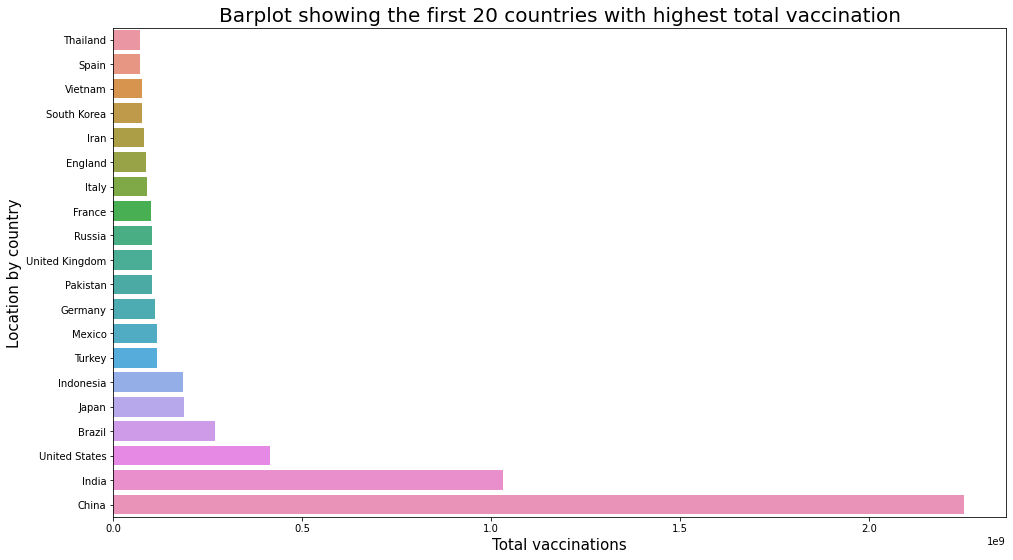

In [23]:
# Barplot showing first 20 countries with highest total vaccination 
plt.figure(figsize = (16,9))
sns.barplot(y = 'location', x = 'total_vaccinations',
           data = df2)
plt.title("Barplot showing the first 20 countries with highest total vaccination", fontsize = 20)
plt.xlabel("Total vaccinations", fontsize = 15)
plt.ylabel("Location by country", fontsize = 15)
plt.show()

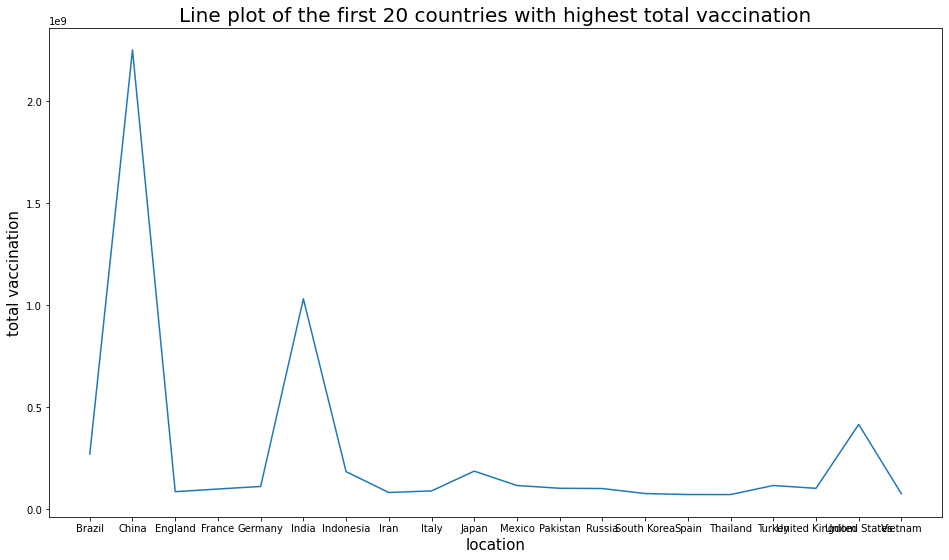

In [24]:
# Line plot of first 20 countries with highest total vaccination
plt.figure(figsize = (16,9))
sns.lineplot(data=df2, x="location", y="total_vaccinations")
plt.title("Line plot of the first 20 countries with highest total vaccination", fontsize = 20)
plt.xlabel("location", fontsize = 15)
plt.ylabel("total vaccination", fontsize = 15)
plt.show()

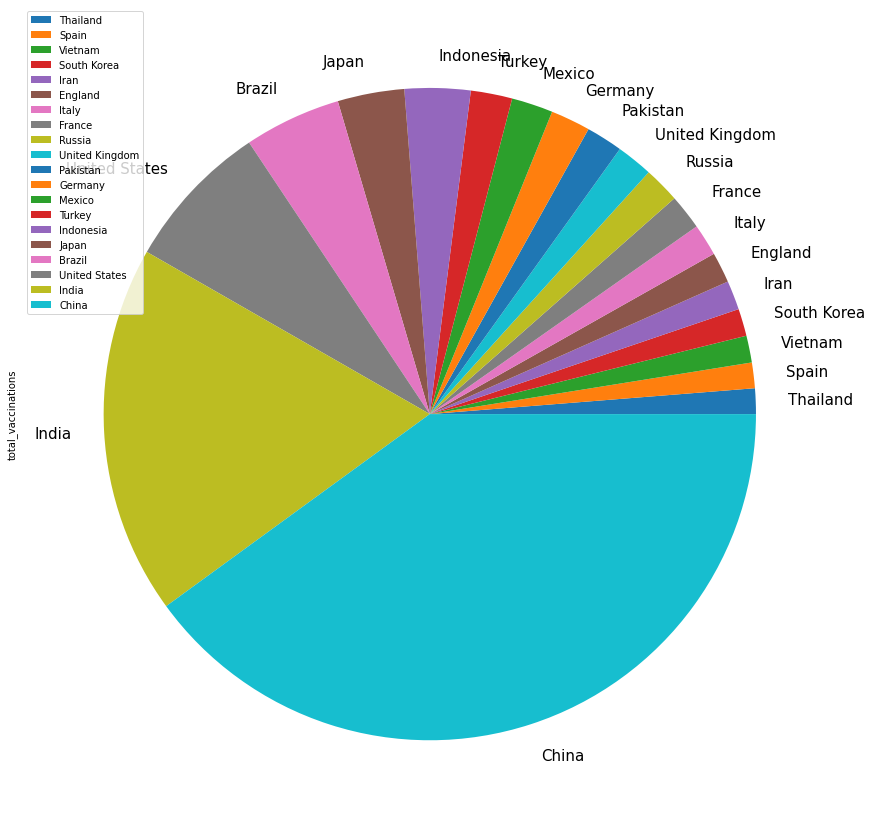

In [25]:
#Pie Chart of first 20 countries with highest total vaccination
df2=df2.set_index('location')
plot = df2.plot.pie(y='total_vaccinations', figsize=(15, 15), fontsize= 15)

### Visualizing first 20 countries with highest full vaccination

In [26]:
df3=df1.nlargest(20, 'people_fully_vaccinated', keep='first')
df3=df3.sort_values("people_fully_vaccinated")
df3[['location', 'people_fully_vaccinated']]

,location,people_fully_vaccinated
41079,Philippines,26180669.0
9182,Canada,28102038.0
51026,Thailand,28713904.0
24295,Iran,30139400.0
48249,South Korea,36709777.0
48748,Spain,37250048.0
15474,England,38204812.0
39650,Pakistan,39303110.0
25728,Italy,42865931.0
54156,United Kingdom,45582891.0


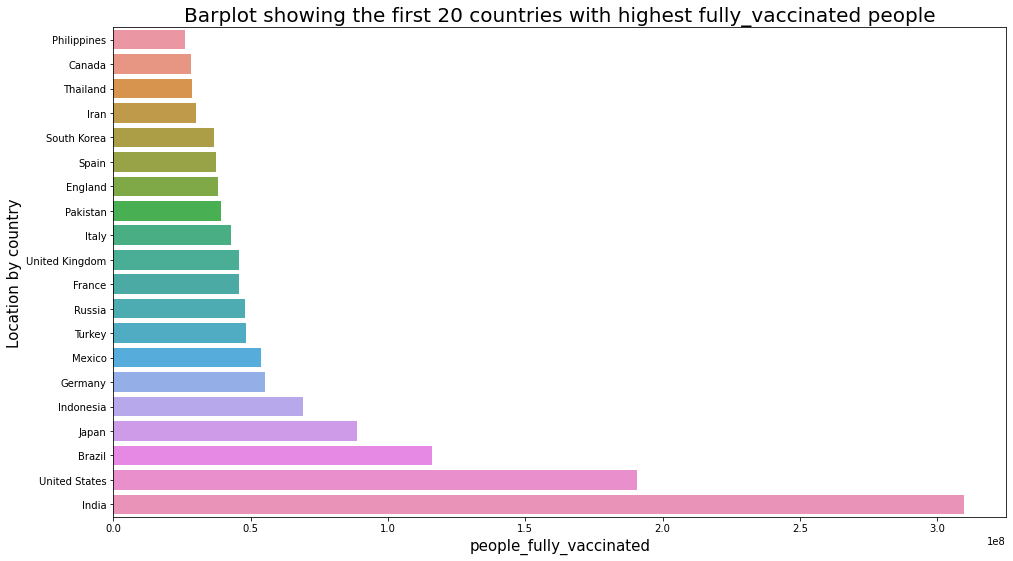

In [27]:
# barplot showing first 20 countries with highest fully vaccinated people
plt.figure(figsize = (16,9))
sns.barplot(y = 'location', x = 'people_fully_vaccinated',
           data = df3)
plt.title("Barplot showing the first 20 countries with highest fully_vaccinated people", fontsize = 20)
plt.xlabel("people_fully_vaccinated", fontsize = 15)
plt.ylabel("Location by country", fontsize = 15)
plt.show()

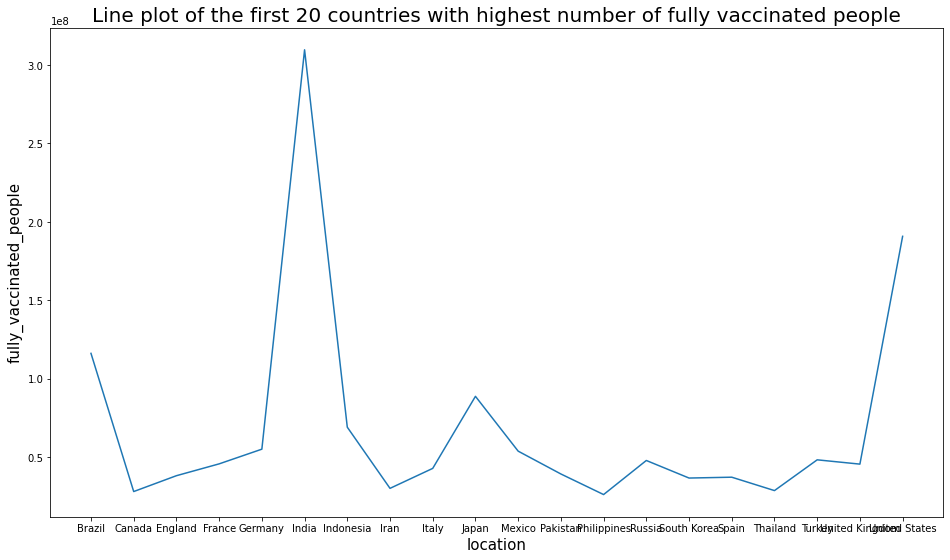

In [28]:
# Line plot of first 20 countries with highest fully vaccinated people
plt.figure(figsize = (16,9))
sns.lineplot(data=df3, x="location", y="people_fully_vaccinated")
plt.title("Line plot of the first 20 countries with highest number of fully vaccinated people", fontsize = 20)
plt.xlabel("location", fontsize = 15)
plt.ylabel("fully_vaccinated_people", fontsize = 15)
plt.show()

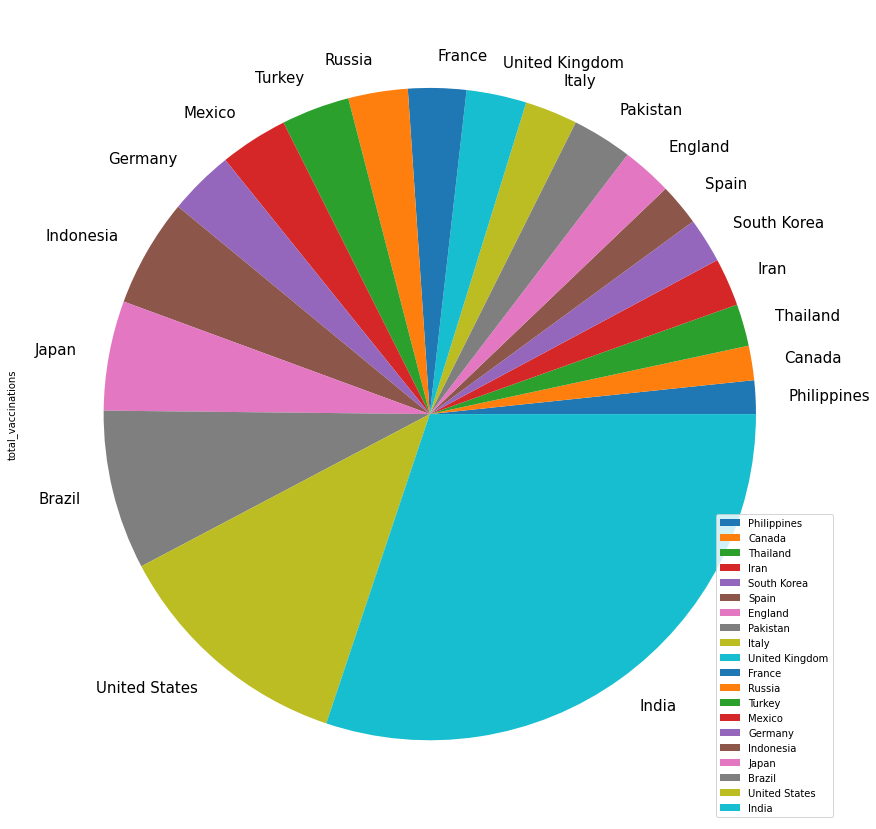

In [29]:
#Pie Chart showing 20 countries with highest fully vaccinated people
df3=df3.set_index('location')
plot = df3.plot.pie(y='total_vaccinations', figsize=(15, 15), fontsize= 15)

### first 20 cuntries with highest total vaccination per hundred

In [30]:
df4=df1.nlargest(20, 'total_vaccinations_per_hundred', keep='first')
df4=df4.sort_values("total_vaccinations_per_hundred", ascending=False)
df4[['location', 'total_vaccinations_per_hundred']]

,location,total_vaccinations_per_hundred
19983,Gibraltar,259.33
12384,Cuba,224.06
53867,United Arab Emirates,209.59
41164,Pitcairn,200.00
55025,Uruguay,188.63
10302,Chile,183.75
25424,Israel,180.54
46278,Singapore,170.38
32412,Malta,169.02
45771,Seychelles,167.03


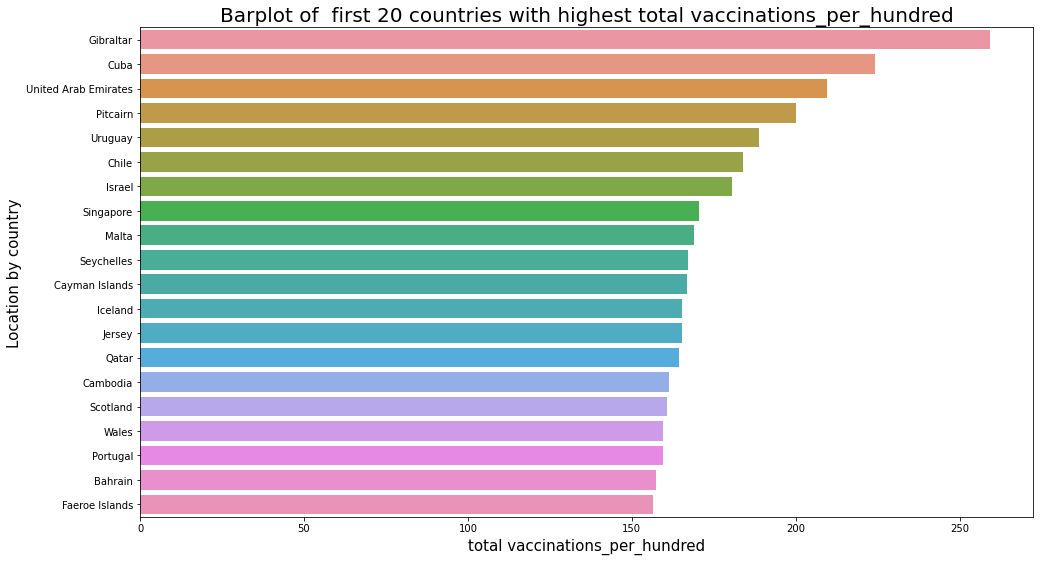

In [31]:
# Barplot showing the first 20 countries with highest total vaccination per hundred
plt.figure(figsize = (16,9))
sns.barplot(y = 'location', x = 'total_vaccinations_per_hundred',
           data = df4)
plt.title("Barplot of  first 20 countries with highest total vaccinations_per_hundred", fontsize = 20)
plt.xlabel("total vaccinations_per_hundred", fontsize = 15)
plt.ylabel("Location by country", fontsize = 15)
plt.show()

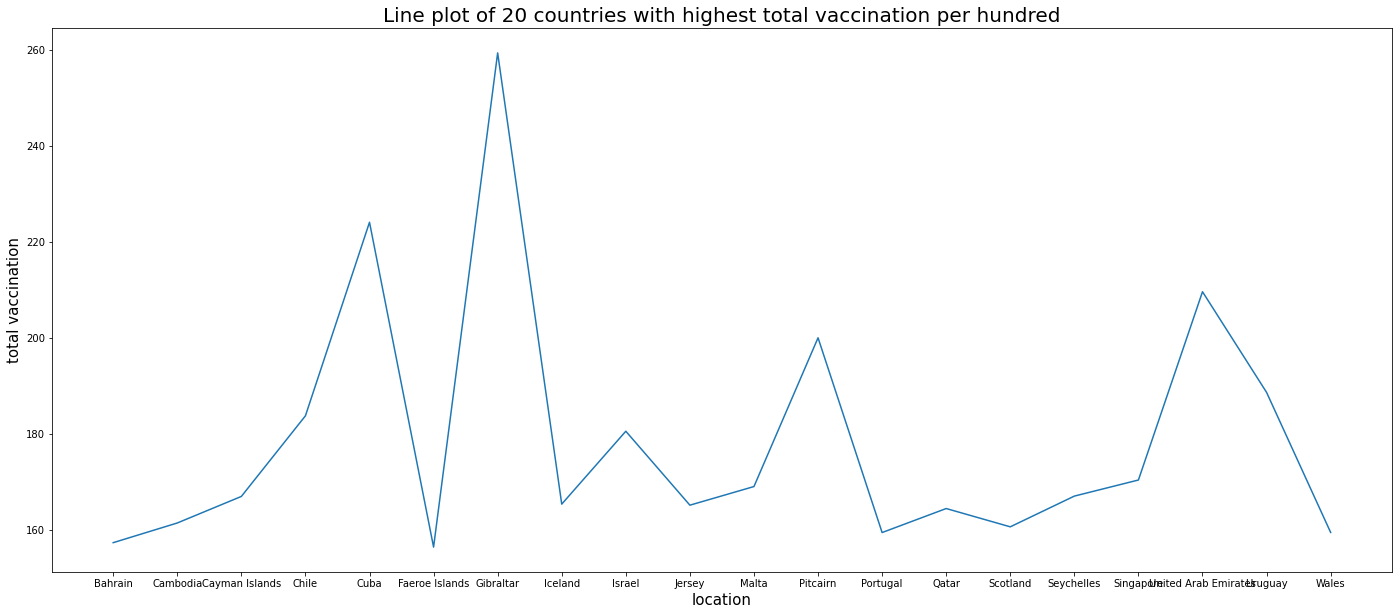

In [32]:
# Line plot of first 2o countries with highest total vaccinations per hundred
plt.figure(figsize = (24,10))
sns.lineplot(data=df4, x="location", y="total_vaccinations_per_hundred")
plt.title("Line plot of 20 countries with highest total vaccination per hundred", fontsize = 20)
plt.xlabel("location", fontsize = 15)
plt.ylabel("total vaccination", fontsize = 15)
plt.show()

### Pie chart of first 20 countries with highest total vacination per hundred

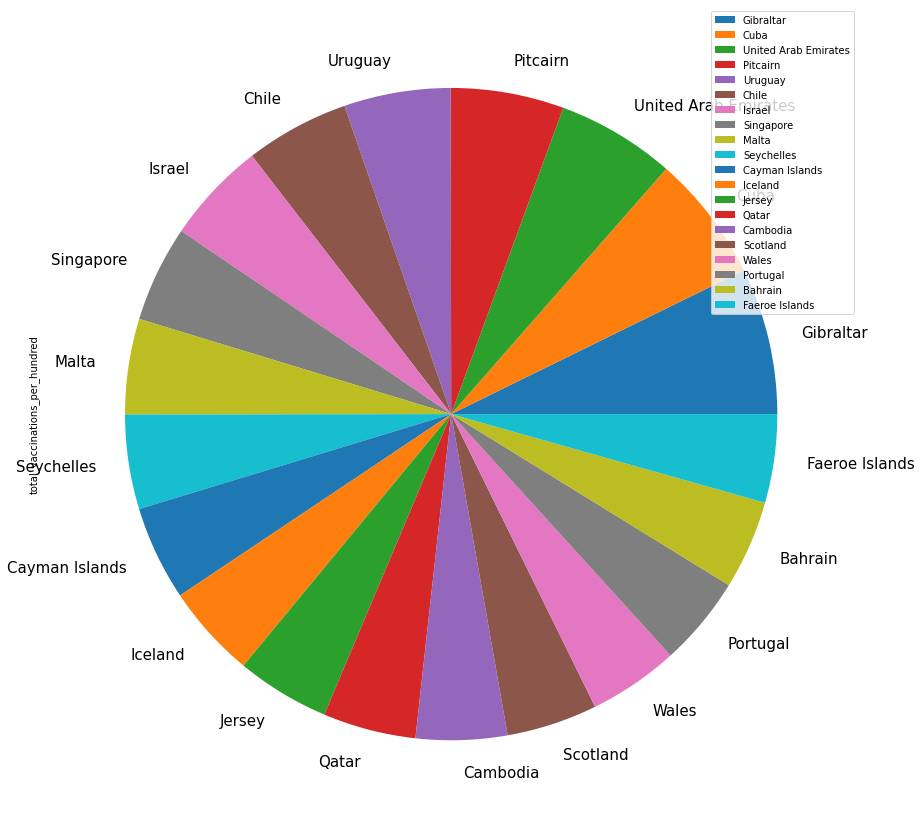

In [33]:
#Pie Chart of first 20 countries with highest total vaccination per hundred
df4=df4.set_index('location')
plot = df4.plot.pie(y='total_vaccinations_per_hundred', figsize=(15, 15), fontsize= 15)

In [34]:
# Adding columns for year, month and day to our vaccines dataset

In [35]:
df_vacc['year'],df_vacc['month'],df_vacc['day'] = df_vacc.date.dt.year, df_vacc.date.dt.month, df_vacc.date.dt.day

### Comparing the trend of vaccination for the top 5 countries with highest total vaccinations

In [36]:
#creating dataframe for top 5 total vaccinated countries
dfc= df_vacc.loc[(df_vacc.location== "United States") | (df_vacc.location== "China")| (df_vacc.location== "India")| (df_vacc.location== "United Kingdom")|(df_vacc.location== "Brazil")]

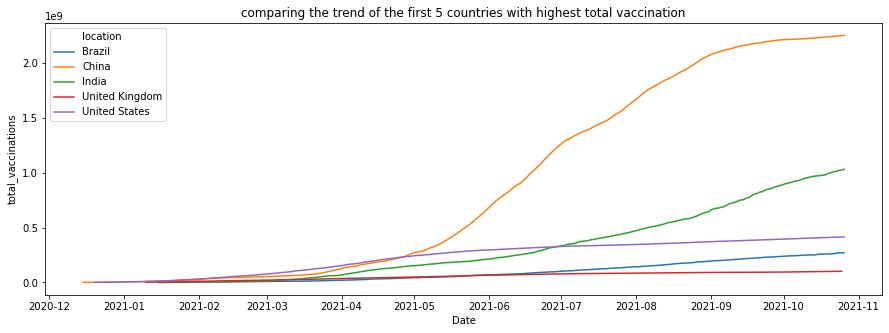

In [37]:
#total vaccination comparison 
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= dfc,hue= "location")
plt.xlabel("Date")
plt.title("comparing the trend of the first 5 countries with highest total vaccination")
plt.show()

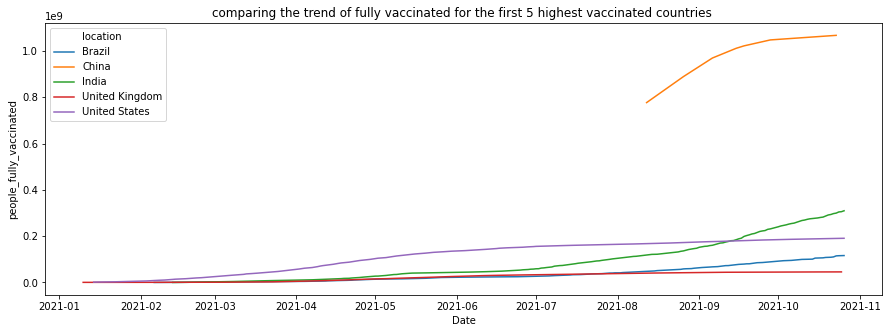

In [38]:
# People full vaccinated comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= dfc,hue= "location")
plt.xlabel("Date")
plt.title("comparing the trend of fully vaccinated for the first 5 highest vaccinated countries ")
plt.show()

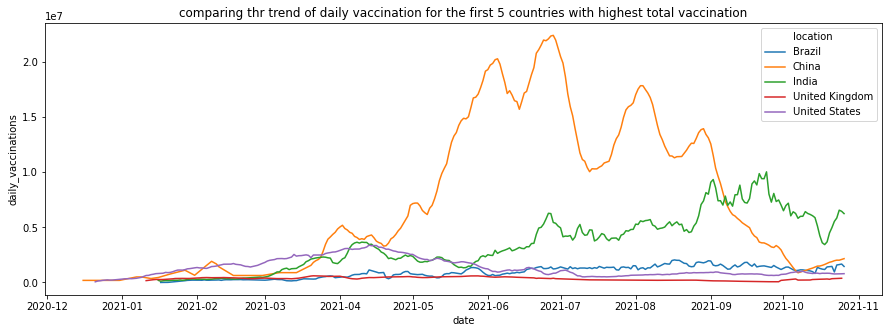

In [ ]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= dfc,hue= "location")
plt.title('comparing thr trend of daily vaccination for the first 5 countries with highest total vaccination')
plt.show()

In [ ]:
#total vaccination per hundred comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations_per_hundred" ,data= dfc,hue= "location")
plt.xlabel("Date")
plt.title("comparing the trend of total vaccination per hundred for the first 5 highest vaccinated countries ")
plt.show()

### Analysing the progress of covid_19 vaccination in the United States for 2021

In [ ]:
df_v = df_vacc[(df_vacc.location == 'United States') & (df_vacc.year == 2021)]

In [ ]:
dfg=df_v.groupby('month').sum()
dfg[['daily_vaccinations']]
dfg.reset_index(level=0, inplace=True) 
dfg=dfg[['month', 'daily_vaccinations']]
dfg.rename(columns={'daily_vaccinations': 'monthly_vaccinations'}, inplace=True)
dfg = dfg.sort_values(by="month")
dfg

In [ ]:
dfg['month']= dfg['month'].astype(str)
dfg['month']= dfg['month'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [ ]:
dfg

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(y = 'monthly_vaccinations', x = 'month',
           data = dfg)
plt.title("Barplot of monthly vaccinations in the US for 2021 ", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("monthly_vaccinations", fontsize = 15)
plt.show()

In [ ]:
dfg

In [ ]:
# Line plot

dfg.plot(kind='line', x='month', y='monthly_vaccinations', color='red', figsize=(20,10), title = 'plot of monthly vaccinations', fontsize=20)


In [ ]:
#Pie Chart
dfg=dfg.set_index('month')
plot = dfg.plot.pie(y='monthly_vaccinations', figsize=(15, 15), fontsize= 15)

## Comments
From the bar plot and pie chart the month of April has the highest vaccination rate

## Vaccines by manufacturer dataset

### Focusing on the US

In [ ]:
dfvc_usa = df_vacc_manufac[df_vacc_manufac['location']=='United States']
dfvc_usa.head()

In [ ]:
#Type of vaccines used in the US so far
dfvc_usa['vaccine'].unique()

Three kind of vaccines are used so far in the US

In [ ]:
dfvc_usa1=dfvc_usa.groupby('vaccine').tail(1)
dfvc_usa1

In [ ]:
# Barplot plot showing how much of the different vaccines have been administered in the USA

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(y = 'total_vaccinations', x = 'vaccine',
           data = dfvc_usa1)
plt.title("Barplot showing how much of the different vaccines have been administered in the US", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("monthly_vaccinations", fontsize = 15)
plt.show()

In [ ]:
#Pie Chart showing 20 countries with highest people fully vaccinated
df6=dfvc_usa1.set_index('vaccine')
plot = df6.plot.pie(y='total_vaccinations', figsize=(15, 15), fontsize= 15)

## Comments
Pfizer Vaccine has been administered the most in the US, follow by Moderna

The least administered so far is Johnson&Johnson, probably because it was approved by CDC the last.
